# Principal Component Analysis

Principal Component Analysis or PCA can be thought as the way of transforming data into a new coordinate system, such that the data loss is very minimum. 

The idea is to take a system with higher dimensions and bring it to a lower dimensions such the mean distance between the points to the best fitting line is greatly reduced. Thus reducing the noise. 

The projection that comes out as the result of PCA has to have similar variance as the original system.

Another way to think of PCA can be, fitting a p-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only an equally small amount of information.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Steps to Computing a PCA

1. Compute the column mean
2. Multiply the Column mean to each of the rows. Thus creating a mean matrix. This will ensure that the all the vector will be in the same mean
3. Subtract the original matrix with mean matrix
4. Compute the covariance 
5. Compute the Eigen values and Eigen vector of the calculated covariance

In [2]:
def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (rows, cols) = X.shape
    X = X - np.tile(np.mean(X, 0), (rows, 1))
    (val, vec) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, vec[:, 0:no_dims])
    return Y

*The first PCA will contain the maximum information because the variance will high in first than the second and so forth.*

# Understanding Singular matrix

- Matrix whose determinant is zero is called an Singular matrix

In [3]:

A = np.random.randn(3,3)

In [4]:
np.linalg.det(A) == 0

False

In [5]:
A = np.array([
    [1, 2],
    [2, 4]
])

In [6]:
np.linalg.det(A) == 0

True

In [7]:
b = np.random.randn(2, 1)

In [8]:
x = np.linalg.inv(A)@b

LinAlgError: Singular matrix

## Understanding Eigen values and Vector

Eigen means perfect. 

Eigen values are scalar vector that changes the strength of the vector. Whereas eigen Vectors are vectors whose direction does not change when the system goes through a Linear Transformation. 

Eigen values and vectors are the unchanging factor for a matrix. It makes sure that the some axis of the matrix remains contant irrespective of the linear changes that a matrix goes through--rotation, sheer, stretching.

In [9]:
P = np.array([
    [0,1],
    [1,0]
])

In [10]:
np.linalg.eig(P)

(array([ 1., -1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

*Fact: The eigen values of a matrix are the sum of the diagonal of the matrix*

In [11]:
val, vect = pca(P)

Preprocessing the data using PCA...


## Visualising PCA 

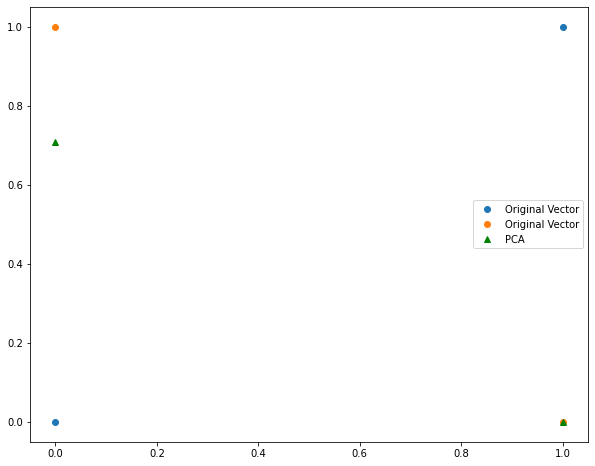

In [12]:
plt.figure(figsize=(10,8))
plt.plot(P, 'o', label = 'Original Vector')
plt.plot(vect, 'g^', label = 'PCA')
plt.legend()
plt.show()

In [13]:
A = np.random.rand(1000, 3)
vec = pca(A)

Preprocessing the data using PCA...


In [14]:
import seaborn as sns

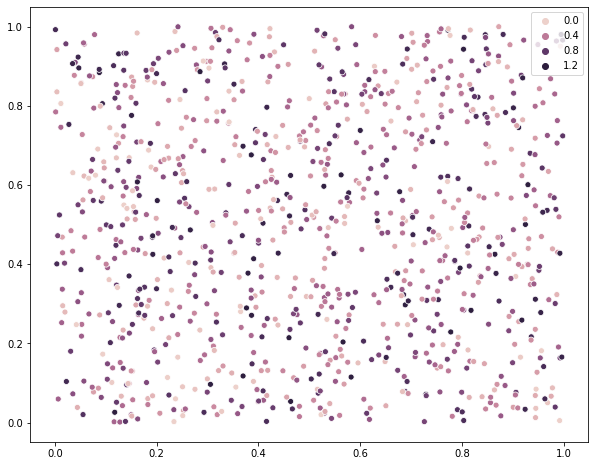

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(A[:,0], A[:,1], hue=A[:, 2])

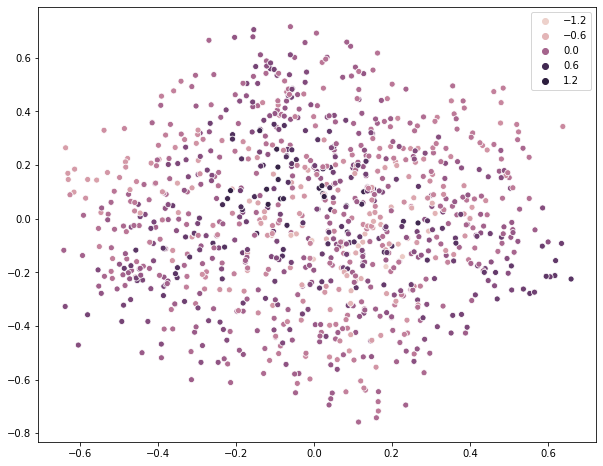

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(vec[:,0], vec[:,1], hue=vec[:, 2])

## Image Processing

In image processing, processed images of faces can be seen as vectors whose components are the brightnesses of each pixel. The dimension of this vector space is the number of pixels. The eigenvectors of the covariance matrix associated with a large set of normalized pictures of faces are called eigenfaces; this is an example of principal component analysis. They are very useful for expressing any face image as a linear combination of some of them. In the facial recognition branch of biometrics, eigenfaces provide a means of applying data compression to faces for identification purposes. Research related to eigen vision systems determining hand gestures has also been made.

In [17]:
import pandas as pd
from glob import glob
from skimage.io import imread
import os

In [18]:
PATH = 'natural-images/'

In [19]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    return data

In [20]:
data = process_data('Mix/*.jpg')
data

,path
0,natural-images/Mix/car_0017.jpg
1,natural-images/Mix/car_0003.jpg
2,natural-images/Mix/airplane_0002.jpg
3,natural-images/Mix/airplane_0016.jpg
4,natural-images/Mix/airplane_0017.jpg
...,...
179,natural-images/Mix/car_0020.jpg
180,natural-images/Mix/car_0018.jpg
181,natural-images/Mix/airplane_0019.jpg
182,natural-images/Mix/airplane_0018.jpg


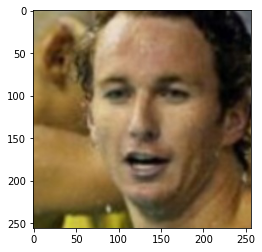

In [21]:
plt.imshow(imread(data.path[162]))

In [22]:
X = imread(data.path[162])/255.

In [23]:
X_new = X.reshape(196608, -1)

In [24]:
reduced = pca(X_new)

Preprocessing the data using PCA...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


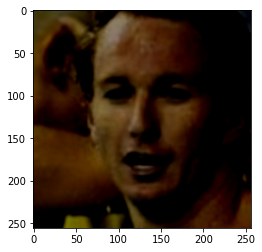

In [25]:
plt.imshow(reduced.reshape(256, 256, 3))

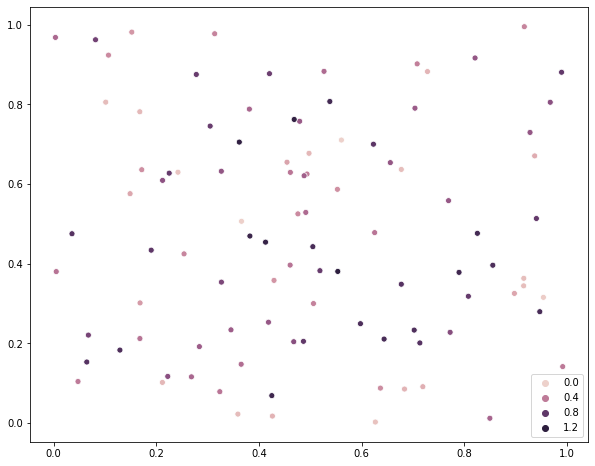

In [28]:
R = np.random.rand(100, 3)
plt.figure(figsize=(10, 8))
sns.scatterplot(R[:,0], R[:,1], hue=R[:, 2])

In [32]:
R_new = (R - np.tile(np.mean(R, 0), (100, 1)))

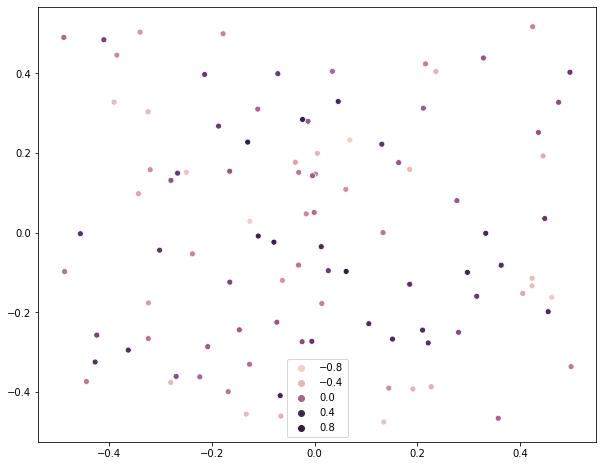

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(R_new[:,0], R_new[:,1], hue=R_new[:, 2])

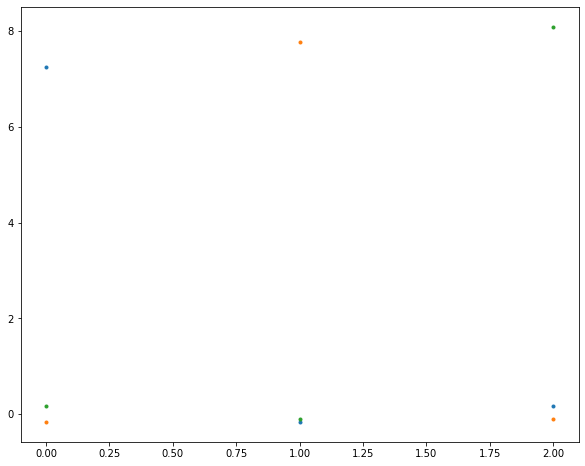

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(np.dot(R_new.T, R_new), '.')

In [39]:
val, vec = np.linalg.eig(np.dot(R_new.T, R_new))

In [52]:
vec

array([[-0.95744994, -0.22005479, -0.18672308],
       [-0.2531816 ,  0.32990552,  0.90942918],
       [ 0.13852327, -0.91800776,  0.37158184]])

In [42]:
PCA = np.dot(R_new, vec)

In [45]:
np.var(PCA[:, 0])

0.07186047334448964

In [46]:
np.var(PCA[:, 1])

0.08166275978932072

In [47]:
np.var(PCA[:, 2])

0.07756076479576653

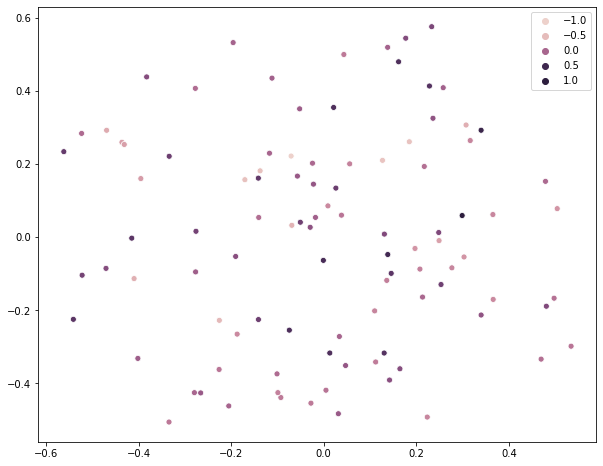

In [48]:
plt.figure(figsize=(10, 8))
sns.scatterplot(PCA[:,0], PCA[:,1], hue=PCA[:, 2])

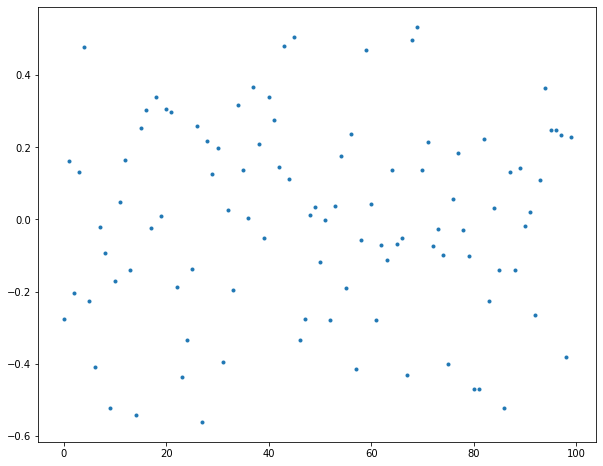

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(PCA[:,0], '.')

In [53]:
PCA

array([[-0.27676334, -0.09513255,  0.04609618],
       [ 0.16177076,  0.47990317,  0.42464237],
       [-0.20509058, -0.4619667 ,  0.00130339],
       [ 0.1311014 ,  0.00833684,  0.20333015],
       [ 0.47915291,  0.15273724, -0.02908321],
       [-0.22597719, -0.36208636, -0.1067164 ],
       [-0.4096663 , -0.11339553, -0.4421501 ],
       [-0.0221506 ,  0.14501041,  0.10797468],
       [-0.09257192, -0.43883841, -0.13509179],
       [-0.52303053,  0.28389449, -0.03645595],
       [-0.17029664,  0.15724557, -0.52911365],
       [ 0.04725665, -0.35131697,  0.10231163],
       [ 0.16465943, -0.36019447,  0.16754672],
       [-0.14097644, -0.22547346,  0.28695447],
       [-0.54086157, -0.22488739,  0.37399316],
       [ 0.25346853, -0.12960104,  0.28211102],
       [ 0.30318934, -0.05426362, -0.29338343],
       [-0.02420756,  0.20238556, -0.02793709],
       [ 0.3400767 ,  0.29256256,  0.52760856],
       [ 0.00911701,  0.08558716, -0.22373112],
       [ 0.30758246,  0.30688782, -0.438

In [55]:
np.argmax(PCA)

65

In [56]:
A = np.random.rand(30, 3)

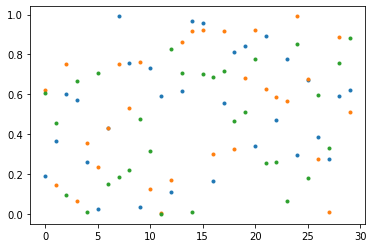

In [57]:
plt.plot(A, '.')

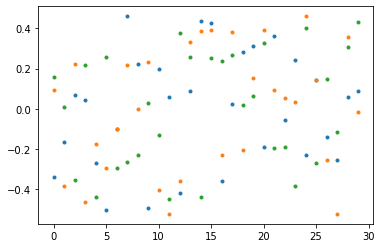

In [61]:
plt.plot(A - np.tile(np.mean(A, 0), (30, 1)), '.')

In [62]:

A_mean = A - np.tile(np.mean(A, 0), (30, 1))

In [65]:
_, Vec = np.linalg.eig(np.dot(A_mean.T, A_mean))

In [67]:
components = np.dot(A_mean, Vec)

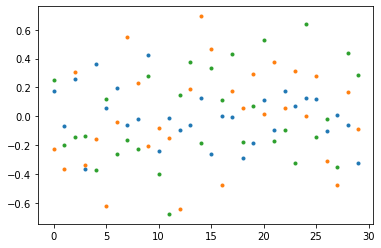

In [69]:
plt.plot(components, '.')

In [71]:
np.var(components[:, 0])

0.03561548806289747

In [72]:
np.var(components[:, 1])

0.11354983035328071

In [73]:
np.var(components[:, 2])

0.09811162403986261